In [1]:
import logging
import warnings

logging.basicConfig(level=logging.WARNING)
warnings.filterwarnings('ignore')

In [2]:
import os
import pickle
import sys

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import geopandas as gpd
import matplotlib.pyplot as plt
import modapsclient as m
import numpy as np
import numpy.ma as ma
import pandas as pd
import rioxarray as rxr
import xarray as xr

from datetime import datetime
from rasterio.plot import show
from rasterio.plot import plotting_extent, show
from shapely.geometry import box

### Load data from pickles into corresponding lists

In [3]:
with open('intersections.pkl', 'rb') as f:
    intersections_300 = pickle.load(f)
    
with open('intersections_search_results.pkl', 'rb') as f:
    intersections_search_results_300 = pickle.load(f)

#### List intersections_300 consists of all the intersections (sublists) found.

In [4]:
intersections_300

[[{'checksum': '3260480235',
   'fileId': '5061830233',
   'fileName': 'MOD35_L2.A2019280.2025.061.2019281071617.hdf',
   'fileSizeBytes': '2788634',
   'fileType': 'MOD35_L2',
   'ingestTime': '2019-10-08 07:16:38.930065',
   'online': 'true',
   'startTime': '2019-10-07 20:25:00.0'},
  {'bbox': [9.88331968395428,
    9.538098629824674,
    13.9746849673457,
    13.573273031541795],
   'search_result_list': [0, 0, 0, 0, 1],
   'delta': 300,
   'item_type': 'MOD35_L2',
   'timestamp': 1570479663,
   'ts_diff': 237,
   'geoloc_fileId': '5061763447'}],
 [{'checksum': '3260480235',
   'fileId': '5061830233',
   'fileName': 'MOD35_L2.A2019280.2025.061.2019281071617.hdf',
   'fileSizeBytes': '2788634',
   'fileType': 'MOD35_L2',
   'ingestTime': '2019-10-08 07:16:38.930065',
   'online': 'true',
   'startTime': '2019-10-07 20:25:00.0'},
  {'bbox': [11.014102540241067,
    8.022039881700309,
    15.08637831532236,
    12.058910550839446],
   'search_result_list': [0, 0, 0, 0, 1],
   'delta':

#### Each sublist (intersection) consists of two dictionaries:
- Dictionary 1 - Cloud data downloaded from the source API (keys are different for each product)
- Dictionary 2 - Data about the search in which the intersection was found.

In [5]:
intersections_300[0]

[{'checksum': '3260480235',
  'fileId': '5061830233',
  'fileName': 'MOD35_L2.A2019280.2025.061.2019281071617.hdf',
  'fileSizeBytes': '2788634',
  'fileType': 'MOD35_L2',
  'ingestTime': '2019-10-08 07:16:38.930065',
  'online': 'true',
  'startTime': '2019-10-07 20:25:00.0'},
 {'bbox': [9.88331968395428,
   9.538098629824674,
   13.9746849673457,
   13.573273031541795],
  'search_result_list': [0, 0, 0, 0, 1],
  'delta': 300,
  'item_type': 'MOD35_L2',
  'timestamp': 1570479663,
  'ts_diff': 237,
  'geoloc_fileId': '5061763447'}]

#### List intersections_search_results_300 consists of sublists that are representing search results for each product

In [6]:
intersections_search_results_300

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0,

#### Total number of timestamps that we searched through

In [7]:
len(intersections_search_results_300)

6868

#### Sum 10-minute timeframes search results

In [8]:
sum_search_results_300 = [sum(i) for i in zip(*intersections_search_results_300)]
sum_search_results_300

[91, 3230, 0, 380, 443]

#### Sum 10-minute timeframes search results but with maximum 1 item in each timestamp

In [9]:
search_results_300_max1 = [[1 if ele > 0 else 0 for ele in sublist] for sublist in intersections_search_results_300]
sum_search_results_300_max1 = [sum(i) for i in zip(*search_results_300_max1)]

sum_search_results_300_max1

[5, 24, 0, 320, 375]

- we can see here that planet data with less than 10 minutes timestamp difference were found only in 24 timestamps
- the fifth element is the list is the number of MOD35 product -> this also proves that MYD35 and MOD35 products are the best
- LANDSAT8 data is not usable at all since not a single intersection was found in 10 minutes timeframe


#### See how many types of items have been found in timestamps

The final list contains number of timestamps with [0, 1, 2, 3, 4] item types.

In [10]:
occ_0 = 0
occ_1 = 0
occ_2 = 0
occ_3 = 0
occ_4 = 0
occ_5 = 0

for sublist in search_results_300_max1:
    nodata_ele = 0
    for ele in sublist:
        if ele == 0:
            nodata_ele += 1
    if nodata_ele == 5:
        occ_0 += 1
    elif nodata_ele == 4:
        occ_1 += 1
    elif nodata_ele == 3:
        occ_2 += 1
    elif nodata_ele == 2:
        occ_3 += 1
    elif nodata_ele == 1:
        occ_4 += 1
    else:
        occ_5 += 1

occurances_300 = [occ_0, occ_1, occ_2, occ_3, occ_4, occ_5]
occurances_300

[6189, 638, 37, 4, 0, 0]

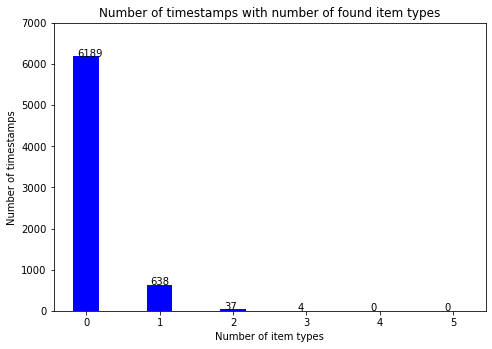

In [11]:
N = 6
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bars = ax.bar(ind, occurances_300, width, color='b')
ax.set_ylabel('Number of timestamps')
ax.set_xlabel('Number of item types')
ax.set_title('Number of timestamps with number of found item types')
ax.set_xticks(ind, ('0', '1', '2', '3', '4', '5'))
ax.set_yticks(np.arange(0, 8000, 1000))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.05, yval + 0.55, yval)
    
plt.show()

#### Sorting intersections by ts_diff

In [12]:
intersections_300_sorted = sorted(intersections_300, key=lambda k: k[-1]['ts_diff'])
intersections_300_sorted

[[{'_links': {'_self': 'https://api.planet.com/data/v1/item-types/PSScene4Band/items/20200616_043445_1050',
    'assets': 'https://api.planet.com/data/v1/item-types/PSScene4Band/items/20200616_043445_1050/assets/',
    'thumbnail': 'https://tiles.planet.com/data/v1/item-types/PSScene4Band/items/20200616_043445_1050/thumb'},
   '_permissions': [],
   'assets': ['analytic',
    'analytic_dn',
    'analytic_dn_xml',
    'analytic_sr',
    'analytic_xml',
    'basic_analytic',
    'basic_analytic_dn',
    'basic_analytic_dn_nitf',
    'basic_analytic_dn_rpc',
    'basic_analytic_dn_rpc_nitf',
    'basic_analytic_dn_xml',
    'basic_analytic_dn_xml_nitf',
    'basic_analytic_nitf',
    'basic_analytic_rpc',
    'basic_analytic_rpc_nitf',
    'basic_analytic_xml',
    'basic_analytic_xml_nitf',
    'basic_udm',
    'basic_udm2',
    'udm',
    'udm2'],
   'geometry': {'coordinates': [[[56.65977527713538, 39.85061771193318],
      [56.92496836978469, 39.89347688820233],
      [56.943158164570

#### Search for timestamps in intersections_300 where the most item types (3) have been found, sort them and convert them to datetime

In [13]:
intersections_3sources_timestamps_list = []
for item in intersections_300:
    nodata_ele = 0
    for ele in item[-1]['search_result_list']:
        if ele == 0:
            nodata_ele += 1
    if nodata_ele == 2:
        intersections_3sources_timestamps_list.append(item[-1]['timestamp'])            

intersections_3sources_timestamps_set = set(intersections_3sources_timestamps_list)
intersections_3sources_timestamps_list = list(intersections_3sources_timestamps_set)
intersections_3sources_timestamps_list.sort()
intersections_3sources_datetime_list = [datetime.utcfromtimestamp(ele).strftime('%Y-%m-%d %H:%M:%S') for ele in intersections_3sources_timestamps_list]
intersections_3sources_datetime_list

['2019-12-30 18:34:26',
 '2020-06-16 05:02:15',
 '2020-06-16 05:02:45',
 '2020-06-16 05:03:15']

#### Search for intersections in intersections_300 where the 3 item types have been found

In [14]:
intersections_300_3itemtypes_list = []

for item in intersections_300_sorted:
    if item[-1]['search_result_list'].count(0) == 2:
        intersections_300_3itemtypes_list.append(item)
        
len(intersections_300_3itemtypes_list)

761

#### Search for intersections with less than 5 seconds timestamp difference

In [15]:
intersections_lt5tsdiff_list = sorted([item for item in intersections_300 if item[-1]['ts_diff'] < 5], key=lambda k: k[-1]['ts_diff'])
len(intersections_lt5tsdiff_list)

111

In [16]:
intersections_lt5tsdiff_list

[[{'_links': {'_self': 'https://api.planet.com/data/v1/item-types/PSScene4Band/items/20200616_043445_1050',
    'assets': 'https://api.planet.com/data/v1/item-types/PSScene4Band/items/20200616_043445_1050/assets/',
    'thumbnail': 'https://tiles.planet.com/data/v1/item-types/PSScene4Band/items/20200616_043445_1050/thumb'},
   '_permissions': [],
   'assets': ['analytic',
    'analytic_dn',
    'analytic_dn_xml',
    'analytic_sr',
    'analytic_xml',
    'basic_analytic',
    'basic_analytic_dn',
    'basic_analytic_dn_nitf',
    'basic_analytic_dn_rpc',
    'basic_analytic_dn_rpc_nitf',
    'basic_analytic_dn_xml',
    'basic_analytic_dn_xml_nitf',
    'basic_analytic_nitf',
    'basic_analytic_rpc',
    'basic_analytic_rpc_nitf',
    'basic_analytic_xml',
    'basic_analytic_xml_nitf',
    'basic_udm',
    'basic_udm2',
    'udm',
    'udm2'],
   'geometry': {'coordinates': [[[56.65977527713538, 39.85061771193318],
      [56.92496836978469, 39.89347688820233],
      [56.943158164570

- get only the timestamps without duplicates and sort them

In [17]:
intersections_lt5tsdiff_timestamps_list = [item[-1]['timestamp'] for item in intersections_300 if item[-1]['ts_diff'] < 5]
intersections_lt5tsdiff_timestamps_set = set(intersections_lt5tsdiff_timestamps_list)
intersections_lt5tsdiff_timestamps_list = list(intersections_lt5tsdiff_timestamps_set)
intersections_lt5tsdiff_timestamps_list.sort()
intersections_lt5tsdiff_timestamps_list

[1570491303,
 1570497003,
 1570502703,
 1572075002,
 1573078502,
 1577730836,
 1577730866,
 1577763596,
 1577769296,
 1578510897,
 1578516597,
 1578548997,
 1578549297,
 1590478504,
 1592282055,
 1592282085,
 1592282475,
 1592283735,
 1593071703,
 1593072003,
 1610439767,
 1610785743,
 1610786703,
 1612598817,
 1612598847,
 1613012997,
 1613018397,
 1613101797,
 1613102097,
 1613107497]

- convert timestamps to datetime

In [18]:
intersections_lt5tsdiff_datetime_list = [datetime.utcfromtimestamp(ele).strftime('%Y-%m-%d %H:%M:%S') for ele in intersections_lt5tsdiff_timestamps_list]
intersections_lt5tsdiff_datetime_list

['2019-10-07 23:35:03',
 '2019-10-08 01:10:03',
 '2019-10-08 02:45:03',
 '2019-10-26 07:30:02',
 '2019-11-06 22:15:02',
 '2019-12-30 18:33:56',
 '2019-12-30 18:34:26',
 '2019-12-31 03:39:56',
 '2019-12-31 05:14:56',
 '2020-01-08 19:14:57',
 '2020-01-08 20:49:57',
 '2020-01-09 05:49:57',
 '2020-01-09 05:54:57',
 '2020-05-26 07:35:04',
 '2020-06-16 04:34:15',
 '2020-06-16 04:34:45',
 '2020-06-16 04:41:15',
 '2020-06-16 05:02:15',
 '2020-06-25 07:55:03',
 '2020-06-25 08:00:03',
 '2021-01-12 08:22:47',
 '2021-01-16 08:29:03',
 '2021-01-16 08:45:03',
 '2021-02-06 08:06:57',
 '2021-02-06 08:07:27',
 '2021-02-11 03:09:57',
 '2021-02-11 04:39:57',
 '2021-02-12 03:49:57',
 '2021-02-12 03:54:57',
 '2021-02-12 05:24:57']

#### Search for intersections in intersections_300 with less than 5 seconds timestamp difference and divide them into separate lists by item types

In [19]:
intersections_lt5tsdiff_sentinel = [item for item in intersections_300 if item[-1]['item_type'] == 'Sentinel2L1C' and item[-1]['ts_diff'] < 5]
intersections_lt5tsdiff_planet = [item for item in intersections_300 if item[-1]['item_type'] == 'PSScene4Band' and item[-1]['ts_diff'] < 5]
intersections_lt5tsdiff_landsat = [item for item in intersections_300 if item[-1]['item_type'] == 'Landsat8L1G' and item[-1]['ts_diff'] < 5]
intersections_lt5tsdiff_myd = [item for item in intersections_300 if item[-1]['item_type'] == 'MYD35_L2' and item[-1]['ts_diff'] < 5]
intersections_lt5tsdiff_mod = [item for item in intersections_300 if item[-1]['item_type'] == 'MOD35_L2' and item[-1]['ts_diff'] < 5]

print(len(intersections_lt5tsdiff_sentinel), len(intersections_lt5tsdiff_planet), len(intersections_lt5tsdiff_landsat), len(intersections_lt5tsdiff_myd), len(intersections_lt5tsdiff_mod))

2 89 0 10 10


- get timestamps of modis intersections (lt 5s timestamp diff)

In [20]:
intersections_lt5tsdiff_myd_timestamps_list = [item[-1]['timestamp'] for item in intersections_lt5tsdiff_myd]
intersections_lt5tsdiff_myd_timestamps_set = set(intersections_lt5tsdiff_myd_timestamps_list)
intersections_lt5tsdiff_myd_timestamps_list = list(intersections_lt5tsdiff_myd_timestamps_set)
intersections_lt5tsdiff_myd_timestamps_list.sort()
intersections_lt5tsdiff_myd_datetime_list = [datetime.utcfromtimestamp(ele).strftime('%Y-%m-%d %H:%M:%S') for ele in intersections_lt5tsdiff_myd_timestamps_list]
intersections_lt5tsdiff_myd_datetime_list

['2019-10-26 07:30:02',
 '2019-12-31 03:39:56',
 '2019-12-31 05:14:56',
 '2020-01-08 19:14:57',
 '2020-01-08 20:49:57',
 '2020-05-26 07:35:04',
 '2020-06-25 08:00:03',
 '2021-01-16 08:45:03',
 '2021-02-11 03:09:57',
 '2021-02-12 03:54:57']

In [21]:
intersections_lt5tsdiff_mod_timestamps_list = [item[-1]['timestamp'] for item in intersections_lt5tsdiff_mod]
intersections_lt5tsdiff_mod_timestamps_set = set(intersections_lt5tsdiff_mod_timestamps_list)
intersections_lt5tsdiff_mod_timestamps_list = list(intersections_lt5tsdiff_mod_timestamps_set)
intersections_lt5tsdiff_mod_timestamps_list.sort()
intersections_lt5tsdiff_mod_datetime_list = [datetime.utcfromtimestamp(ele).strftime('%Y-%m-%d %H:%M:%S') for ele in intersections_lt5tsdiff_mod_timestamps_list]
intersections_lt5tsdiff_mod_datetime_list

['2019-10-07 23:35:03',
 '2019-10-08 01:10:03',
 '2019-10-08 02:45:03',
 '2019-11-06 22:15:02',
 '2020-01-09 05:49:57',
 '2020-01-09 05:54:57',
 '2020-06-25 07:55:03',
 '2021-02-11 04:39:57',
 '2021-02-12 03:49:57',
 '2021-02-12 05:24:57']

- get timestamp of planet intersections (lt 10s timestamp diff)

In [22]:
intersections_lt5tsdiff_planet_timestamps_list = [item[-1]['timestamp'] for item in intersections_lt5tsdiff_planet]
intersections_lt5tsdiff_planet_timestamps_set = set(intersections_lt5tsdiff_planet_timestamps_list)
intersections_lt5tsdiff_planet_timestamps_list = list(intersections_lt5tsdiff_planet_timestamps_set)
intersections_lt5tsdiff_planet_timestamps_list.sort()
intersections_lt5tsdiff_planet_datetime_list = [datetime.utcfromtimestamp(ele).strftime('%Y-%m-%d %H:%M:%S') for ele in intersections_lt5tsdiff_planet_timestamps_list]
intersections_lt5tsdiff_planet_datetime_list

['2019-12-30 18:33:56',
 '2019-12-30 18:34:26',
 '2020-06-16 04:34:15',
 '2020-06-16 04:34:45',
 '2020-06-16 04:41:15',
 '2020-06-16 05:02:15',
 '2021-01-12 08:22:47',
 '2021-01-16 08:29:03',
 '2021-02-06 08:06:57',
 '2021-02-06 08:07:27']

- get timestamp of sentinel intersection (lt 10s timestamp diff)

In [23]:
intersections_lt5tsdiff_sentinel_timestamps_list = [item[-1]['timestamp'] for item in intersections_lt5tsdiff_sentinel]
intersections_lt5tsdiff_sentinel_timestamps_set = set(intersections_lt5tsdiff_sentinel_timestamps_list)
intersections_lt5tsdiff_sentinel_timestamps_list = list(intersections_lt5tsdiff_sentinel_timestamps_set)
intersections_lt5tsdiff_sentinel_timestamps_list.sort()
intersections_lt5tsdiff_sentinel_datetime_list = [datetime.utcfromtimestamp(ele).strftime('%Y-%m-%d %H:%M:%S') for ele in intersections_lt5tsdiff_sentinel_timestamps_list]
intersections_lt5tsdiff_sentinel_datetime_list

['2021-01-12 08:22:47']

#### Get Modis filenames

In [24]:
myd_fileId_list = [item[0]['fileId'] for item in intersections_lt5tsdiff_myd]
mod_fileId_list = [item[0]['fileId'] for item in intersections_lt5tsdiff_mod]
modis_fileId_list = myd_fileId_list + mod_fileId_list

myd_filename_list = [item[0]['fileName'] for item in intersections_lt5tsdiff_myd]
mod_filename_list = [item[0]['fileName'] for item in intersections_lt5tsdiff_mod]
modis_filename_list = myd_filename_list + mod_filename_list


for i in modis_filename_list:
    print(i)

MYD35_L2.A2019299.0730.061.2019299191031.hdf
MYD35_L2.A2019365.0340.061.2019365163451.hdf
MYD35_L2.A2019365.0515.061.2019365170204.hdf
MYD35_L2.A2020008.1915.061.2020010182101.hdf
MYD35_L2.A2020008.2050.061.2020010181318.hdf
MYD35_L2.A2020147.0735.061.2020147234322.hdf
MYD35_L2.A2020177.0800.061.2020177192519.hdf
MYD35_L2.A2021016.0845.061.2021016191417.hdf
MYD35_L2.A2021042.0310.061.2021042160625.hdf
MYD35_L2.A2021043.0355.061.2021043152621.hdf
MOD35_L2.A2019280.2335.061.2019281071728.hdf
MOD35_L2.A2019281.0110.061.2019281131750.hdf
MOD35_L2.A2019281.0245.061.2019281132738.hdf
MOD35_L2.A2019310.2215.061.2019311070802.hdf
MOD35_L2.A2020009.0550.061.2020009131048.hdf
MOD35_L2.A2020009.0555.061.2020009131123.hdf
MOD35_L2.A2020177.0755.061.2020177192353.hdf
MOD35_L2.A2021042.0440.061.2021267223046.hdf
MOD35_L2.A2021043.0350.061.2021267223314.hdf
MOD35_L2.A2021043.0525.061.2021267223506.hdf


- get file urls of the modis files from modapsclient

In [25]:
a = m.ModapsClient()

modis_url_list = []
for fileId in modis_fileId_list:
    modis_file_url = a.getFileUrls(fileId)
    modis_url_list.append(modis_file_url[0])

modis_url_list

['https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD35_L2/2019/299/MYD35_L2.A2019299.0730.061.2019299191031.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD35_L2/2019/365/MYD35_L2.A2019365.0340.061.2019365163451.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD35_L2/2019/365/MYD35_L2.A2019365.0515.061.2019365170204.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD35_L2/2020/008/MYD35_L2.A2020008.1915.061.2020010182101.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD35_L2/2020/008/MYD35_L2.A2020008.2050.061.2020010181318.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD35_L2/2020/147/MYD35_L2.A2020147.0735.061.2020147234322.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD35_L2/2020/177/MYD35_L2.A2020177.0800.061.2020177192519.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD35_L2/2021/016/MYD35_L2.A2021016.0845.061.2021016191417.hdf',


- we can use these urls to download these files with data download script provided on modaps: https://ladsweb.modaps.eosdis.nasa.gov/tools-and-services/data-download-scripts/ 
- or we can just download them manually from the laads daac archive here: https://ladsweb.modaps.eosdis.nasa.gov/archive/

In [26]:
intersections_lt5tsdiff_modis = intersections_lt5tsdiff_myd + intersections_lt5tsdiff_mod
modis_geoloc_fileId_list = []
modis_geoloc_url_list = []

for item in intersections_lt5tsdiff_modis:
    modis_geoloc_fileId_list.append(item[-1]['geoloc_fileId'])
    
for fileId in modis_geoloc_fileId_list:
    modis_geoloc_file_url = a.getFileUrls(fileId)
    modis_geoloc_url_list.append(modis_geoloc_file_url[0])

modis_geoloc_url_list

['https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD03/2019/299/MYD03.A2019299.0730.061.2019299151912.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD03/2019/365/MYD03.A2019365.0340.061.2019365162758.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD03/2019/365/MYD03.A2019365.0515.061.2019365164328.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD03/2020/008/MYD03.A2020008.1915.061.2020010180827.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD03/2020/008/MYD03.A2020008.2050.061.2020010180835.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD03/2020/147/MYD03.A2020147.0735.061.2020147154309.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD03/2020/177/MYD03.A2020177.0800.061.2020177164951.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MYD03/2021/016/MYD03.A2021016.0845.061.2021016164948.hdf',
 'https://ladsweb.modaps.eosdis.nasa.gov/archive

- we can also get urls of geolocation files (myd03, mod03), which contain 1km pixel resolution geolocation

In [27]:
modis_geoloc_filename_list = []

for fileId in modis_geoloc_fileId_list:
    modis_geoloc_filename_list.append(a.getFileProperties(fileId)[0]['fileName'])


for i in modis_geoloc_filename_list:
    print(i)

MYD03.A2019299.0730.061.2019299151912.hdf
MYD03.A2019365.0340.061.2019365162758.hdf
MYD03.A2019365.0515.061.2019365164328.hdf
MYD03.A2020008.1915.061.2020010180827.hdf
MYD03.A2020008.2050.061.2020010180835.hdf
MYD03.A2020147.0735.061.2020147154309.hdf
MYD03.A2020177.0800.061.2020177164951.hdf
MYD03.A2021016.0845.061.2021016164948.hdf
MYD03.A2021042.0310.061.2021042155631.hdf
MYD03.A2021043.0355.061.2021043151720.hdf
MOD03.A2019280.2335.061.2019281051021.hdf
MOD03.A2019281.0110.061.2019281065502.hdf
MOD03.A2019281.0245.061.2019281091355.hdf
MOD03.A2019310.2215.061.2019311051938.hdf
MOD03.A2020009.0550.061.2020009111654.hdf
MOD03.A2020009.0555.061.2020009125140.hdf
MOD03.A2020177.0755.061.2020177151736.hdf
MOD03.A2021042.0440.061.2021042105725.hdf
MOD03.A2021043.0350.061.2021043091733.hdf
MOD03.A2021043.0525.061.2021043105145.hdf


- we can merge filename lists together and copy the result list directly to https://ladsweb.modaps.eosdis.nasa.gov/search/locate to download all the files

In [28]:
all_modis_filename_list = modis_geoloc_filename_list + modis_filename_list
for i in all_modis_filename_list:
    print(i)

MYD03.A2019299.0730.061.2019299151912.hdf
MYD03.A2019365.0340.061.2019365162758.hdf
MYD03.A2019365.0515.061.2019365164328.hdf
MYD03.A2020008.1915.061.2020010180827.hdf
MYD03.A2020008.2050.061.2020010180835.hdf
MYD03.A2020147.0735.061.2020147154309.hdf
MYD03.A2020177.0800.061.2020177164951.hdf
MYD03.A2021016.0845.061.2021016164948.hdf
MYD03.A2021042.0310.061.2021042155631.hdf
MYD03.A2021043.0355.061.2021043151720.hdf
MOD03.A2019280.2335.061.2019281051021.hdf
MOD03.A2019281.0110.061.2019281065502.hdf
MOD03.A2019281.0245.061.2019281091355.hdf
MOD03.A2019310.2215.061.2019311051938.hdf
MOD03.A2020009.0550.061.2020009111654.hdf
MOD03.A2020009.0555.061.2020009125140.hdf
MOD03.A2020177.0755.061.2020177151736.hdf
MOD03.A2021042.0440.061.2021042105725.hdf
MOD03.A2021043.0350.061.2021043091733.hdf
MOD03.A2021043.0525.061.2021043105145.hdf
MYD35_L2.A2019299.0730.061.2019299191031.hdf
MYD35_L2.A2019365.0340.061.2019365163451.hdf
MYD35_L2.A2019365.0515.061.2019365170204.hdf
MYD35_L2.A2020008.1915.06